In [37]:
# This 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [38]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()
df = df.drop_duplicates()

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df = df.dropna(subset=['director'])


In [42]:
df['release_year'] = df['date_added'].str[-4:].astype('float')


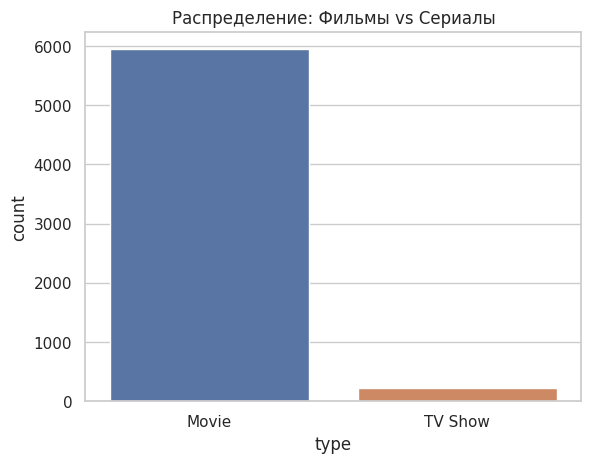

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title("Распределение: Фильмы vs Сериалы")
plt.show()
# 1Фильмы vs Сериалы
# •	Платформа выпускает больше фильмов, чем сериалов. 
# Это показывает ориентацию на контент для однократного просмотра, но сериалы тоже востребованы.


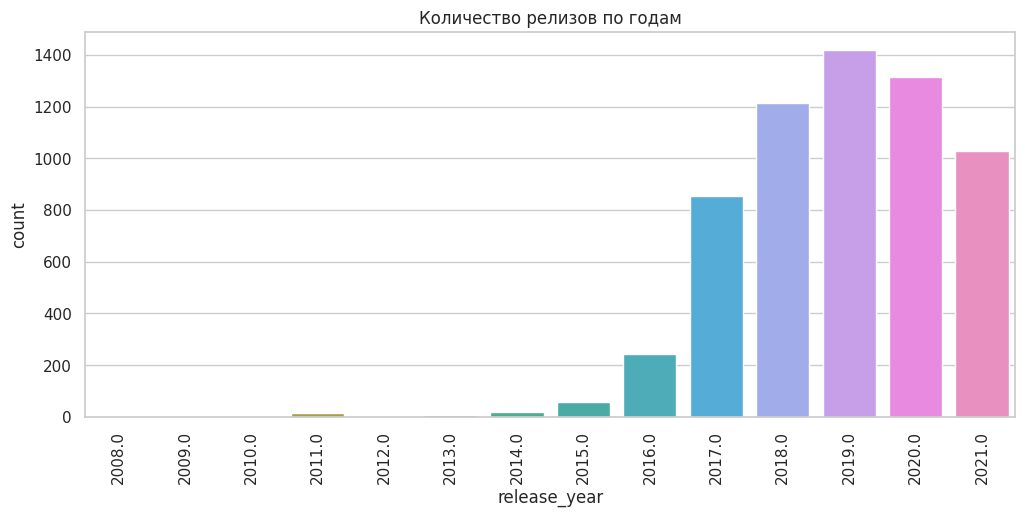

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year')
plt.xticks(rotation=90)
plt.title("Количество релизов по годам")
plt.show()
# 2 Количество релизов по годам
# •	Пик выпуска контента пришёлся на 2019–2020 годы.
# Netflix активно расширял библиотеку в эти годы, что стоит учитывать при планировании будущих релизов.



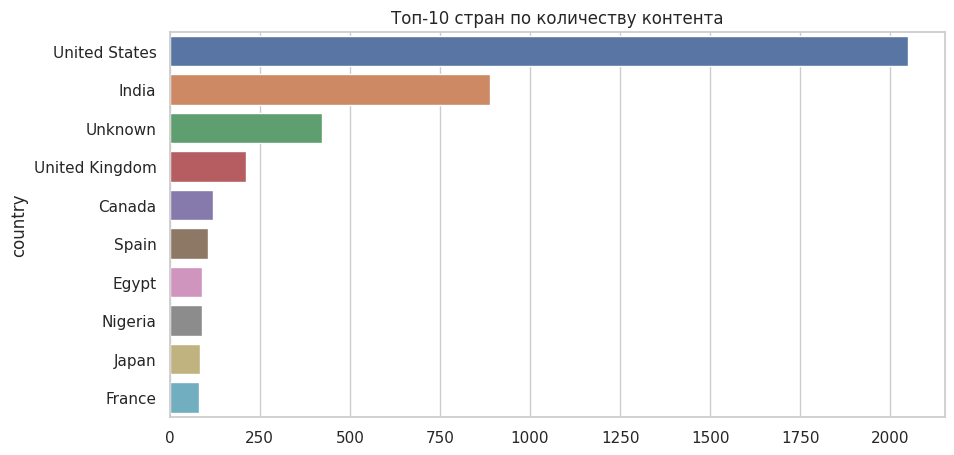

In [45]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Топ-10 стран по количеству контента")
plt.show()
# 3 Топ-10 стран по количеству контента
# •	США лидирует по количеству контента, за ней идут Индия и Великобритания. 
# Эти страны — ключевые рынки, на которых стоит фокусироваться при производстве и локализации контента.


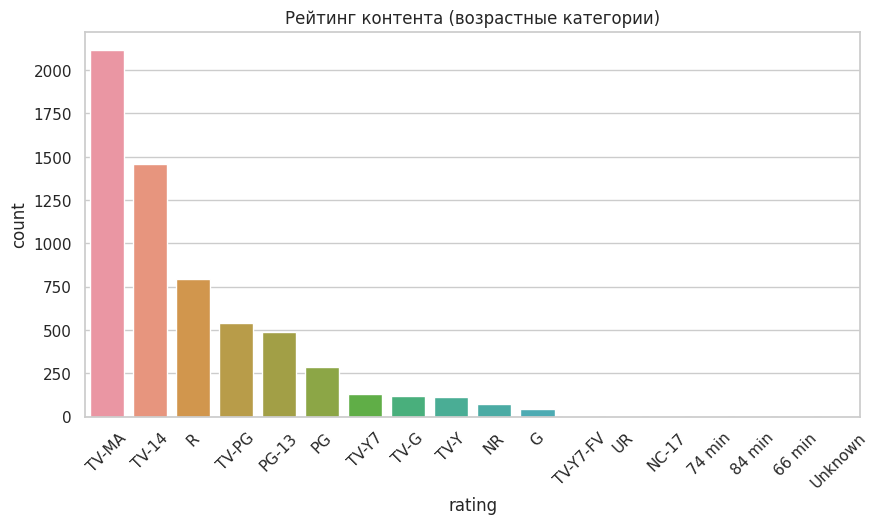

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Рейтинг контента (возрастные категории)")
plt.show()
# 4Рейтинг контента (возрастные категории)
# •	Наибольшее количество контента имеют рейтинги TV-MA, TV-14 и PG-13. 
# Основная аудитория — взрослые и подростки, поэтому контент для этих категорий наиболее востребован.


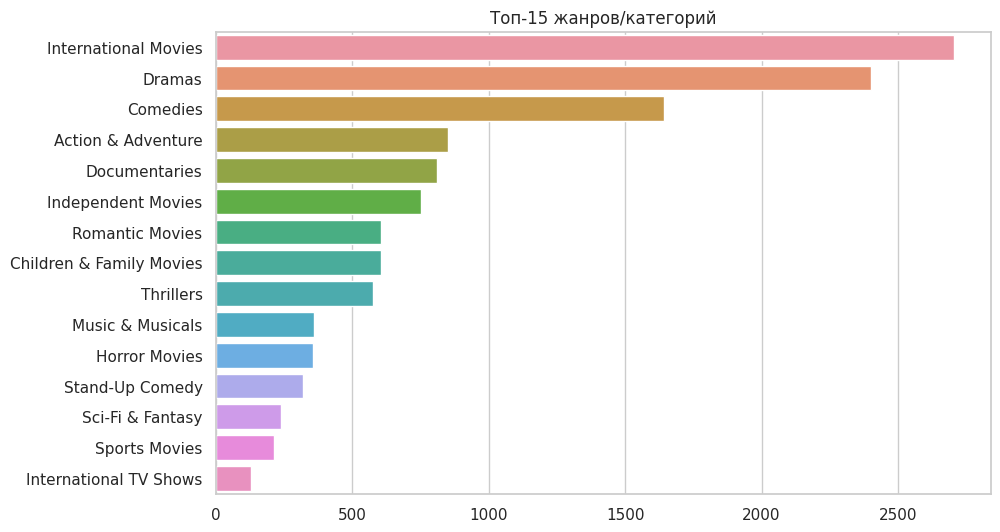

In [47]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=genres.values, y=genres.index)
plt.title("Топ-15 жанров/категорий")
plt.show()
# 5Топ-15 жанров/категорий
# •	Самые популярные жанры — драмы, комедии и документальные фильмы.
# Новый контент стоит ориентировать на эти направления для удержания аудитории.



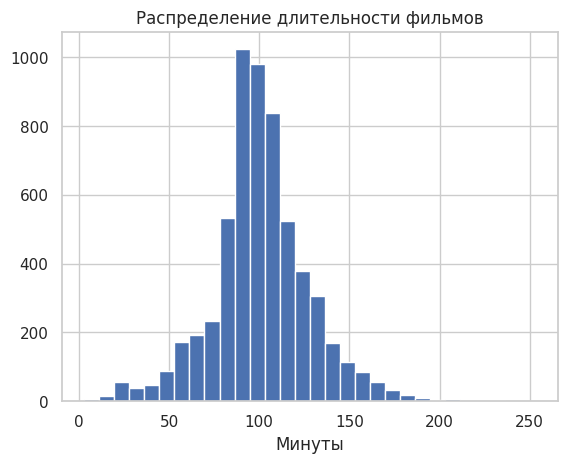

In [48]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype('float')
movies_clean = movies.dropna(subset=['duration_int'])
plt.hist(movies_clean['duration_int'], bins=30)
plt.title("Распределение длительности фильмов")
plt.xlabel("Минуты")
plt.show()
# 6Длительность фильмов
# •	Большинство фильмов имеют длительность 90–120 минут. 
# Это стандартный формат, который удерживает внимание зрителей и подходит для основной аудитории.



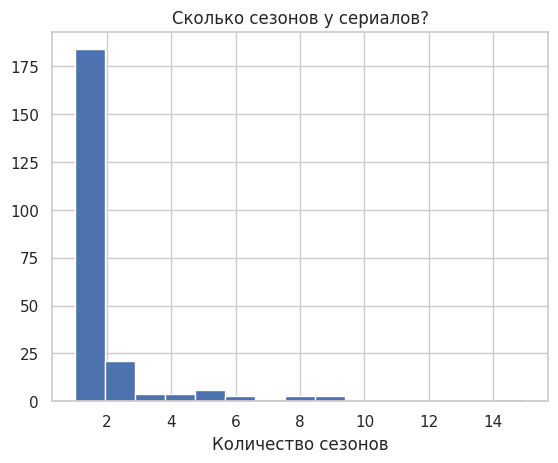

In [49]:
shows = df[df['type'] == 'TV Show'].copy()

shows['seasons'] = shows['duration'].str.extract('(\d+)').astype('int')

shows_clean = shows.dropna(subset=['seasons'])

plt.hist(shows_clean['seasons'], bins=15)
plt.title("Сколько сезонов у сериалов?")
plt.xlabel("Количество сезонов")
plt.show()
# 7 Количество сезонов сериалов
# •	Большинство сериалов имеют 1–2 сезона.
# Новые сериалы лучше планировать на 1–2 сезона с возможностью продления при успешности шоу.



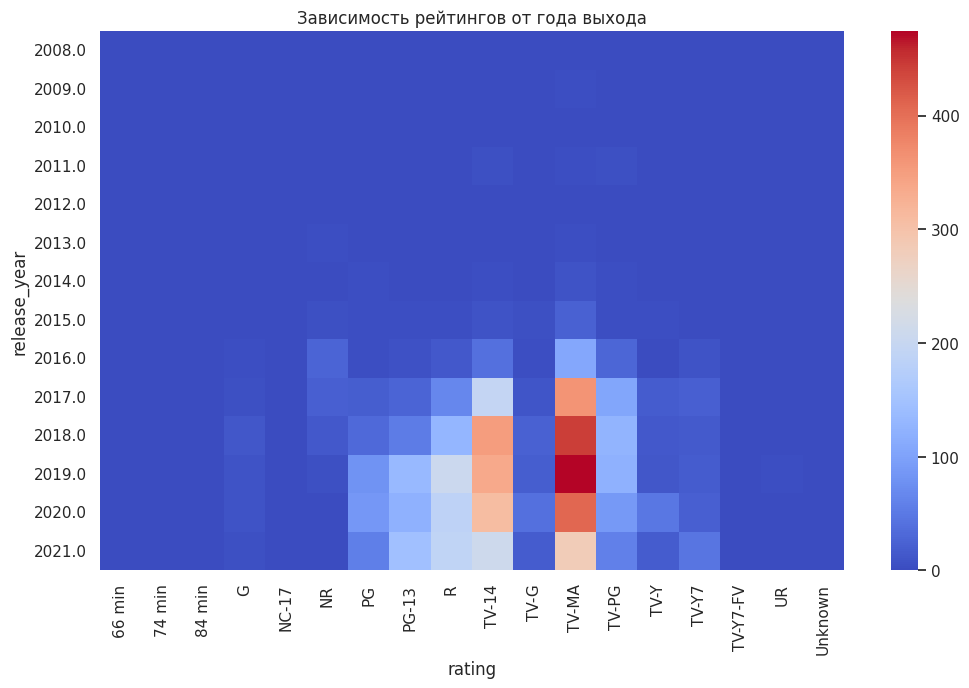

In [50]:
pivot = pd.crosstab(df['release_year'], df['rating'])

plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap='coolwarm')
plt.title("Зависимость рейтингов от года выхода")
plt.show()
# 8 Зависимость рейтингов от года выхода
# •	В последние годы преобладают рейтинги TV-MA и TV-14.
# Тренд показывает рост спроса на контент для взрослых и подростков.


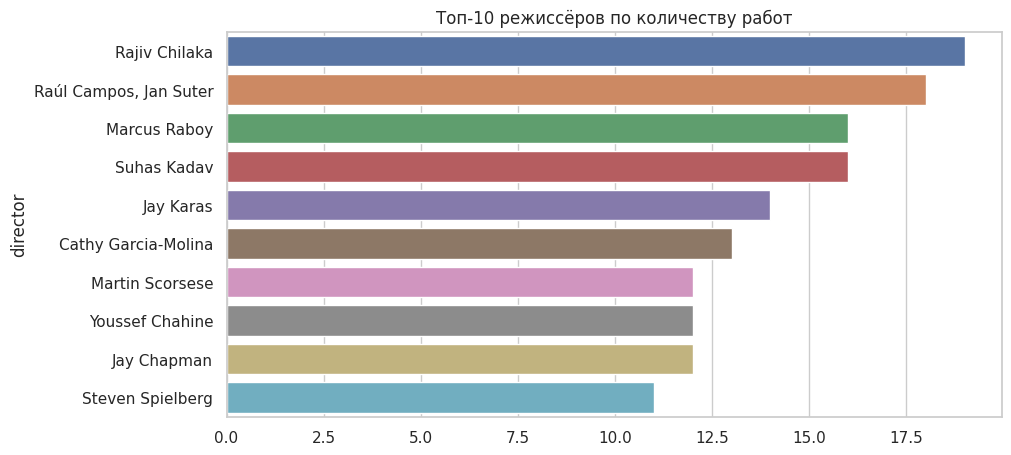

In [51]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Топ-10 режиссёров по количеству работ")
plt.show()
# 9 Топ-10 режиссёров по количеству работ
# •	Небольшая группа режиссёров создаёт значительную часть контента.
# Сотрудничество с топ-режиссёрами помогает поддерживать объём и качество библиотеки.


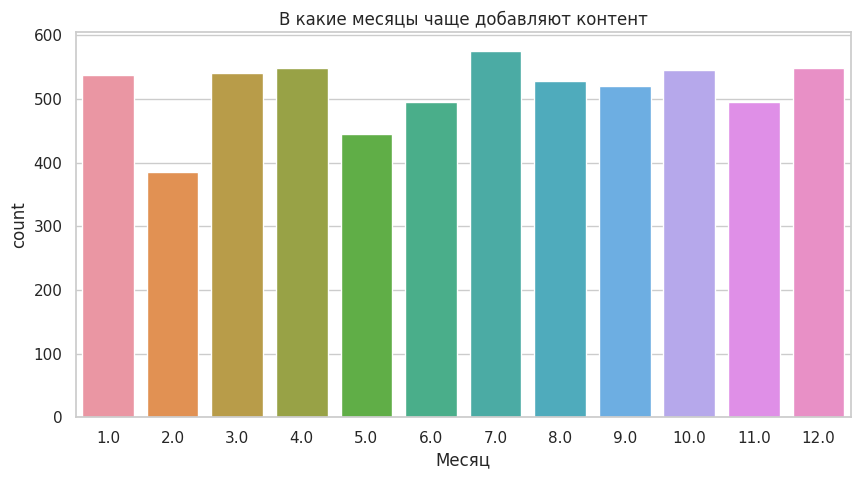

In [52]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['month_added'] = df['date_added'].dt.month
df_month = df.dropna(subset=['month_added'])
plt.figure(figsize=(10,5))
sns.countplot(data=df_month, x='month_added')
plt.title("В какие месяцы чаще добавляют контент")
plt.xlabel("Месяц")
plt.show()
# 10  Контент по месяцам добавления
# •	Наибольшее количество контента добавляется в июле и декабре.
# Эти месяцы стратегически важны для привлечения подписчиков и увеличения просмотров.



In [53]:
# 1. **Какую стратегию контента выбрать — выпускать больше фильмов или сериалов для удержания пользователей?**

# * На платформе Netflix больше фильмов, чем сериалов. Это показывает, что пользователи чаще смотрят короткий контент, поэтому стратегия выпуска фильмов остаётся актуальной.

# 2. **В какие годы был максимальный выпуск контента и стоит ли планировать увеличение производства в аналогичные периоды?**

# * Пик выпуска контента был примерно в 2019–2020 годах. В аналогичные периоды стоит планировать увеличение выпуска, чтобы поддерживать рост аудитории.

# 3. **На какие страны стоит ориентироваться при локализации и производстве контента для расширения аудитории?**

# * США лидирует по количеству контента, за ней идут Индия и Великобритания. Netflix ориентируется на англоязычные рынки, но также стоит рассматривать локализацию для Индии и других стран с большим количеством контента.

# 4. **Какой возрастной категории пользователей выпускать больше контента, чтобы увеличить удержание и просмотры?**

# * Наибольшее количество контента имеет рейтинги TV-MA, TV-14 и PG-13. Основная аудитория — взрослые и подростки, поэтому контент для этих категорий более востребован.

# 5. **Какие жанры являются наиболее востребованными и на какие жанры делать акцент при производстве нового контента?**

# * Наиболее популярные жанры — драмы, комедии и документальные фильмы. Акцент при производстве нового контента стоит делать на эти жанры.

# 6. **Какую среднюю длительность фильмов выбирать, чтобы удерживать внимание зрителей и повышать вовлечённость?**

# * Большинство фильмов имеют длительность 90–120 минут. Это стандартный формат, который удерживает внимание зрителей.

# 7. **Сколько сезонов в среднем стоит планировать для новых сериалов, чтобы оптимально удерживать аудиторию?**

# * Большинство сериалов имеют 1–2 сезона. Новые сериалы лучше планировать на 1–2 сезона с возможностью продления при успешности шоу.

# 8. **Как меняются предпочтения аудитории по возрастным категориям контента с годами, чтобы корректировать стратегию?**

# * В последние годы преобладают рейтинги TV-MA и TV-14. Это показывает тренд на контент для взрослых и подростков, поэтому стратегия должна учитывать рост потребности в таком контенте.

# 9. **С какими режиссёрами стоит продолжать сотрудничество, чтобы поддерживать стабильное качество и объём контента?**

# * Небольшая группа режиссёров создаёт значительную часть контента. Сотрудничество с топ-10 режиссёрами помогает поддерживать объём и качество контента.

# 10. **В какие месяцы планировать массовые релизы контента для максимального эффекта на подписчиков?**

# * Наибольшее количество контента добавляется в июле и декабре. Эти месяцы стратегически важны для привлечения подписчиков и повышения просмотров.

In [2]:
import pandas as pd
print(df.head())
print(df.head(10))


NameError: name 'df' is not defined